Pre-Processing Data

Preparing dataset from BMW Json format to YOLOv7 format

In [10]:
#Preparing dataset from BMW Json format to YOLOv7 format
from PIL import Image

def extract_info_from_json(json_file, image_folder):
    import json
    import os
    
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    # Initialize the info dict 
    info_dict = {}
    info_dict['filename'] = os.path.basename(json_file)
    info_dict['bboxes'] = []
    
    # Extract information from JSON
    for entry in data:
        # Assuming 'ObjectClassName' is the class label in your JSON
        bbox = {
            'class': entry['ObjectClassName'],
            'Left': entry['Left'],
            'Top': entry['Top'],
            'Right': entry['Right'],
            'Bottom': entry['Bottom']
        }
        info_dict['bboxes'].append(bbox)
    
    # Get image size
    image_name = os.path.splitext(info_dict['filename'])[0] + '.jpg'
    image_path = os.path.join(image_folder, image_name)
    
    try:
        with Image.open(image_path) as img:
            info_dict['image_size'] = img.size
    except Exception as e:
        print(f"Error: {e}")
        info_dict['image_size'] = None
    
    return info_dict


In [11]:

json_file_path = r"D:\trying_YOLO\data\data\Training\labels\json\2473.json"
image_folder_path = r"D:\trying_YOLO\data\data\Training\images"
data_info = extract_info_from_json(json_file_path, image_folder_path)
print(data_info)

{'filename': '2473.json', 'bboxes': [{'class': 'dolly', 'Left': 0, 'Top': 250, 'Right': 297, 'Bottom': 324}, {'class': 'jack', 'Left': 496, 'Top': 129, 'Right': 789, 'Bottom': 377}], 'image_size': (1280, 720)}


In [12]:

json_file_path = r"D:\trying_YOLO\data\data\Testing\labels\json\0.json"
image_folder_path = r"D:\trying_YOLO\data\data\Testing\images"
data_info = extract_info_from_json(json_file_path, image_folder_path)
print(data_info)

{'filename': '0.json', 'bboxes': [{'class': 'dolly', 'Left': 287, 'Top': 635, 'Right': 400, 'Bottom': 682}, {'class': 'dolly', 'Left': 249, 'Top': 527, 'Right': 339, 'Bottom': 559}, {'class': 'dolly', 'Left': 370, 'Top': 561, 'Right': 475, 'Bottom': 603}, {'class': 'dolly', 'Left': 497, 'Top': 611, 'Right': 610, 'Bottom': 663}, {'class': 'dolly', 'Left': 643, 'Top': 585, 'Right': 751, 'Bottom': 624}, {'class': 'dolly', 'Left': 797, 'Top': 596, 'Right': 909, 'Bottom': 645}, {'class': 'dolly', 'Left': 627, 'Top': 675, 'Right': 751, 'Bottom': 719}, {'class': 'dolly', 'Left': 0, 'Top': 668, 'Right': 122, 'Bottom': 715}, {'class': 'dolly', 'Left': 136, 'Top': 627, 'Right': 251, 'Bottom': 669}, {'class': 'dolly', 'Left': 125, 'Top': 576, 'Right': 229, 'Bottom': 605}, {'class': 'dolly', 'Left': 166, 'Top': 510, 'Right': 259, 'Bottom': 537}, {'class': 'dolly', 'Left': 335, 'Top': 534, 'Right': 431, 'Bottom': 571}, {'class': 'jack', 'Left': 796, 'Top': 455, 'Right': 884, 'Bottom': 507}], 'image

In [19]:

import os

# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"dolly": 0, "jack": 1, "bin": 2}

# Convert the info dict to the required YOLO format and write it to disk
def convert_to_yolov7(info_dict, output_folder):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
            continue
        
        # Transform the bbox co-ordinates as per the format required by YOLO v7
        b_center_x = (b["Left"] + b["Right"]) / 2 
        b_center_y = (b["Top"] + b["Bottom"]) / 2
        b_width    = (b["Right"] - b["Left"])
        b_height   = (b["Bottom"] - b["Top"])
        
        # Normalize the co-ordinates by the dimensions of the image
        image_w, image_h = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        # Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join(output_folder, info_dict["filename"].replace("json", "txt"))
    
    # Save the annotation to disk
    os.makedirs(output_folder, exist_ok=True)  # Create the specified folder if it doesn't exist
    with open(save_file_name, "w") as file:
        file.write("\n".join(print_buffer))
    
    #print(f"Annotations saved to {save_file_name}")


In [16]:
# Example usage
json_file_path = r"D:\trying_YOLO\data\data\Training\labels\json\2473.json"
image_folder_path = r"D:\trying_YOLO\data\data\Training\images"
output_folder_path = r"D:\trying_YOLO\data\data\Training\annotations"  # Specify your desired folder
data_info = extract_info_from_json(json_file_path, image_folder_path)
convert_to_yolov7(data_info, output_folder_path)

Annotations saved to D:\trying_YOLO\data\data\Training\annotations\2473.txt


In [17]:
# Example usage
json_file_path = r"D:\trying_YOLO\data\data\Testing\labels\json\0.json"
image_folder_path = r"D:\trying_YOLO\data\data\Testing\images"
output_folder_path = r"D:\trying_YOLO\data\data\Testing\annotations"  # Specify your desired folder
data_info = extract_info_from_json(json_file_path, image_folder_path)
convert_to_yolov7(data_info, output_folder_path)

Annotations saved to D:\trying_YOLO\data\data\Testing\annotations\0.txt


In [20]:

import os
from tqdm import tqdm

# Specify the path to the directory containing JSON files
json_dir = r"D:\trying_YOLO\data\data\Training\labels\json"

# Get the list of JSON files
json_files = [os.path.join(json_dir, x) for x in os.listdir(json_dir) if x.endswith(".json")]
json_files.sort()

# Specify the path to the image folder
image_folder_path = r"D:\trying_YOLO\data\data\Training\images"

# Specify the output folder for annotations
output_folder_path = r"D:\trying_YOLO\data\data\Training\annotations"

# Convert and save the annotations
for json_file in tqdm(json_files):
    data_info = extract_info_from_json(json_file, image_folder_path)
    convert_to_yolov7(data_info, output_folder_path)



  0%|          | 0/2494 [00:00<?, ?it/s]

100%|██████████| 2494/2494 [00:36<00:00, 68.14it/s]


In [21]:

import os
from tqdm import tqdm

# Specify the path to the directory containing JSON files
json_dir = r"D:\trying_YOLO\data\data\Testing\labels\json"

# Get the list of JSON files
json_files = [os.path.join(json_dir, x) for x in os.listdir(json_dir) if x.endswith(".json")]
json_files.sort()

# Specify the path to the image folder
image_folder_path = r"D:\trying_YOLO\data\data\Testing\images"

# Specify the output folder for annotations
output_folder_path = r"D:\trying_YOLO\data\data\Testing\annotations"

# Convert and save the annotations
for json_file in tqdm(json_files):
    data_info = extract_info_from_json(json_file, image_folder_path)
    convert_to_yolov7(data_info, output_folder_path)



100%|██████████| 958/958 [00:20<00:00, 46.71it/s]


In [27]:
# import torch
# from IPython.display import Image  # for displaying images
# import os 
# import random

# from sklearn.model_selection import train_test_split

# from tqdm import tqdm
# from PIL import Image, ImageDraw
# import numpy as np
# import matplotlib.pyplot as plt

# random.seed(0)

In [22]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont



def read_yolo_annotation_from_txt(annotation_file):
    with open(annotation_file, "r") as file:
        annotation_list = file.read().splitlines()
        annotation_list = [x.split(" ") for x in annotation_list if x.strip()]  # Filter out empty lines
        annotation_list = [[float(y) if y else 0.0 for y in x] for x in annotation_list]
    return annotation_list



def plot_bounding_box(image, annotation_list, class_names):
    annotations = np.array(annotation_list, dtype=float)
    w, h = image.size
    
    plt.figure(figsize=(12, 8))
    
    plotted_image = ImageDraw.Draw(image)
    
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:, [1,3]] = annotations[:, [1,3]] * w
    transformed_annotations[:, [2,4]] = annotations[:, [2,4]] * h 
    
    transformed_annotations[:, 1] = transformed_annotations[:, 1] - (transformed_annotations[:, 3] / 2)
    transformed_annotations[:, 2] = transformed_annotations[:, 2] - (transformed_annotations[:, 4] / 2)
    transformed_annotations[:, 3] = transformed_annotations[:, 1] + transformed_annotations[:, 3]
    transformed_annotations[:, 4] = transformed_annotations[:, 2] + transformed_annotations[:, 4]

    print("Transformed Coordinates:")
    print(transformed_annotations)
    
    try:
        for ann in transformed_annotations:
            obj_cls, x0, y0, x1, y1 = ann
            color = "blue"
            plotted_image.rectangle(((x0, y0), (x1, y1)), outline=color)
            
            text = f"Class: {class_names[int(obj_cls)]}"
            text_position = (x0, y0 - 10)
            
            font_size = 14
            font = ImageFont.truetype("arial.ttf", font_size)
            plotted_image.text(text_position, text, fill=color, font=font)
    except Exception as e:
        print(f"Error plotting bounding boxes: {e}")
    
    plt.imshow(np.array(image))
    plt.show()





D:\trying_YOLO\data\data\Training\annotations\2184.txt
[[0.0, 0.255, 0.405, 0.192, 0.077], [1.0, 0.504, 0.38, 0.249, 0.275], [1.0, 0.099, 0.504, 0.199, 0.474], [1.0, 0.865, 0.924, 0.269, 0.151]]
0 0.255 0.405 0.192 0.077
1 0.504 0.380 0.249 0.275
1 0.099 0.504 0.199 0.474
1 0.865 0.924 0.269 0.151
Transformed Coordinates:
[[ 0.00000e+00  3.05280e+02  3.95820e+02  6.73920e+02  4.78980e+02]
 [ 1.00000e+00  7.28640e+02  2.61900e+02  1.20672e+03  5.58900e+02]
 [ 1.00000e+00 -9.60000e-01  2.88360e+02  3.81120e+02  8.00280e+02]
 [ 1.00000e+00  1.40256e+03  9.16380e+02  1.91904e+03  1.07946e+03]]


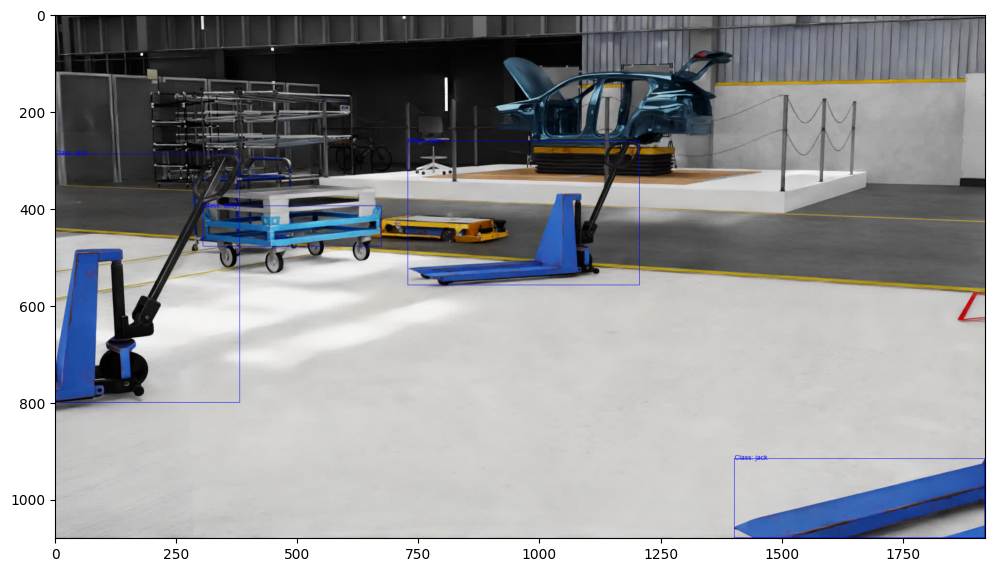

In [23]:
# Specify the path to the folder containing annotation files
annotations_folder = r"D:\trying_YOLO\data\data\Training\annotations"

# Get the list of annotation files
annotations = [os.path.join(annotations_folder, x) for x in os.listdir(annotations_folder) if x.endswith(".txt")]

# Randomly select an annotation file
selected_annotation_file = random.choice(annotations)
print(selected_annotation_file)

# Read the YOLO-formatted annotation information
annotation_list = read_yolo_annotation_from_txt(selected_annotation_file)
print(annotation_list)

# Get the corresponding image file path from the annotation folder
image_file = selected_annotation_file.replace("annotations", "images").replace(".txt", ".jpg")

assert os.path.exists(image_file)

# Define class names (modify based on your class mapping)
class_names = ["dolly", "jack", "bin"]

# Load the image
image = Image.open(image_file)
# Print the content of the annotation file
with open(selected_annotation_file, "r") as file:
    annotation_content = file.read()

print(annotation_content)

# Plot the Bounding Box
plot_bounding_box(image, annotation_list, class_names)

resizing anf putting in a folder to be process faster 640*640--------

In [27]:

import os
import cv2
import matplotlib.pyplot as plt

# Define your custom class labels
class_labels = {0: "dolly", 1: "jack", 2: "bin"}

def resize_image_and_annotation_single(image_path, annotation_path, output_folder):
    # Read image
    img = cv2.imread(image_path)

    # Get image dimensions
    height, width, _ = img.shape

    # Resize image (you can adjust the size as needed)
    new_width, new_height = 640, 640
    resized_img = cv2.resize(img, (new_width, new_height))
    

    # Save resized image in the "resized" folder
    resized_image_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(resized_image_path, resized_img)
    

    # Display the resized image with bounding boxes
    #display_image_with_boxes(resized_img, annotation_path)

    #print("Single image and annotation resized and saved successfully!")


def display_image_with_boxes(image, annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        data = line.split()
        if len(data) == 5:  # Check if line represents a bounding box
            class_id, x_center, y_center, box_width, box_height = map(float, data)

            # Convert normalized coordinates to pixel coordinates
            x_center *= image.shape[1]
            y_center *= image.shape[0]
            box_width *= image.shape[1]
            box_height *= image.shape[0]

            # Calculate bounding box coordinates
            x0 = int(x_center - box_width / 2)
            y0 = int(y_center - box_height / 2)
            x1 = int(x_center + box_width / 2)
            y1 = int(y_center + box_height / 2)

            # Draw bounding box on the image
            cv2.rectangle(image, (x0, y0), (x1, y1), (0, 255, 0), 2)

            # Display class label using custom class labels
            if int(class_id) in class_labels:
                label = class_labels[int(class_id)]
            else:
                label = f"Class {int(class_id)}"
            
            cv2.putText(image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()




2 0.863 0.887 0.084 0.222
2 0.282 0.484 0.063 0.132
0 0.070 0.453 0.084 0.053
0 0.132 0.406 0.087 0.049
0 0.035 0.499 0.070 0.072
0 0.855 0.504 0.139 0.072
1 0.490 0.430 0.157 0.157
1 0.198 0.900 0.345 0.197
1 0.101 0.790 0.202 0.179


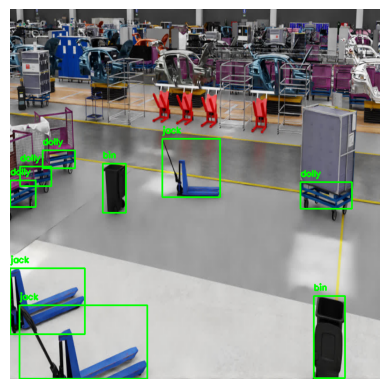

Single image and annotation resized and saved successfully!


In [25]:
# Example usage for a single image
image_path = r"D:\trying_YOLO\data\data\Training\images\0.jpg"  # Replace with your actual image path
annotation_path = r"D:\trying_YOLO\data\data\Training\annotations\0.txt"  # Replace with your actual annotation path
output_folder = r"D:\trying_YOLO\data\data\Training\resized"  # Replace with your desired output folder



with open(annotation_path, "r") as file:
    annotation_content = file.read()

print(annotation_content)

resize_image_and_annotation_single(image_path, annotation_path, output_folder)

In [29]:
import os
from tqdm import tqdm



# Specify the path to the image folder
images_path = r"D:\trying_YOLO\data\data\Training\images"

# Specify the output folder for annotations
annotations_path = r"D:\trying_YOLO\data\data\Training\annotations"

# Specify the output folder for resized images
output_folder = r"D:\trying_YOLO\data\data\Training\resized"


# List all files in the image folder
image_files = [os.path.join(images_path, file) for file in os.listdir(images_path) if file.endswith(".jpg")]

# Convert and save the annotations
for image_file in tqdm(image_files, desc="Processing images"):
    annotation_file = os.path.join(annotations_path, os.path.basename(image_file).replace(".jpg", ".txt"))
    resize_image_and_annotation_single(image_file, annotation_file, output_folder)


Processing images:   0%|          | 0/2494 [00:00<?, ?it/s]

Processing images: 100%|██████████| 2494/2494 [01:09<00:00, 35.92it/s]


In [30]:
import os
from tqdm import tqdm



# Specify the path to the image folder
images_path = r"D:\trying_YOLO\data\data\Testing\images"

# Specify the output folder for annotations
annotations_path = r"D:\trying_YOLO\data\data\Testing\annotations"

# Specify the output folder for resized images
output_folder = r"D:\trying_YOLO\data\data\Testing\resized"


# List all files in the image folder
image_files = [os.path.join(images_path, file) for file in os.listdir(images_path) if file.endswith(".jpg")]

# Convert and save the annotations
for image_file in tqdm(image_files, desc="Processing images"):
    annotation_file = os.path.join(annotations_path, os.path.basename(image_file).replace(".jpg", ".txt"))
    resize_image_and_annotation_single(image_file, annotation_file, output_folder)


Processing images: 100%|██████████| 958/958 [00:29<00:00, 32.41it/s]


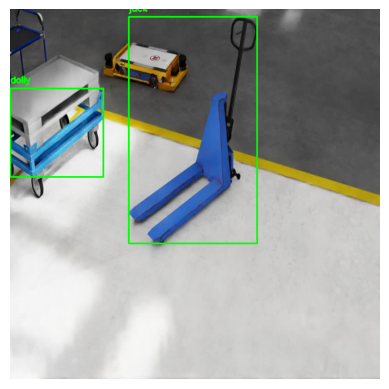

In [31]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the path to the resized image
image_path = r"D:\trying_YOLO\data\data\Training\resized\10.jpg"

# Specify the path to the corresponding resized annotation
annotation_path = r"D:\trying_YOLO\data\data\Training\annotations\10.txt"

# Read the resized image
img = cv2.imread(image_path)

# Display the image with bounding boxes
display_image_with_boxes(img, annotation_path)
